In [56]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import joblib
from utils import Snake
import random
import pickle
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
from sklearn.preprocessing import scale
import random
import math
import matplotlib.pyplot as plt
from pprint import pprint
from time import sleep
from IPython.display import clear_output
from scipy.signal import savgol_filter 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
class StupidBot():
    def __init__(self):
        pass
    def compute(snake = None, grille = None):
        rand = random.randint(1, 4)
        rand_to_input = {
                    1 : 6, #right
                    2 : 4,
                    3 : 8,
                    4 : 5

                }
        return rand_to_input[rand]

class SmartBot():
    def __init__(self):
        pass
    
    def compute(self, state):
        return action
    
position_to_input = {
    0:4,
    1:5,
    2:6,
    3:8
}

input_to_dir = {
    0 :"left",
    2 :"right",
    3 :"up",
    1 :"down"
}
input_to_position = {v:k for k, v in position_to_input.items()}


In [3]:
sizes = (10, 10)
sbot = StupidBot()
sn = Snake(sizes, sbot)
sn.reset()

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [4]:
class QLBot():
    def __init__(self):
        pass
    def compute(a):
        
        return 

In [5]:
game_history = list(sn.play())

In [6]:
grille_torch = list(game_history)[0][1]

In [7]:
grille_torch

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0, 1],
 [1, 2, 2, 3, -9, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, -9, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [8]:
torch.tensor(grille_torch).unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 12, 12])

In [9]:
num_actions=4
def preprocess_grille(grille, to_cnn=False):
    #grille_scaled = scale(grille)
    grille_scaled = grille
    grille_torch = torch.tensor(grille_scaled, dtype=torch.float64)
    if to_cnn:
        return grille_torch.reshape(-1, 1, 12, 12).float()
    grille_torch_flat = grille_torch.flatten()
    return grille_torch_flat.float().unsqueeze(0)

class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size, num_actions):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.bn1 = nn.BatchNorm1d(self.hidden_size)
            self.drop1 = nn.Dropout(0.2)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, num_actions)
            self.soft = torch.nn.Softmax(dim=1)
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            drop = self.drop1(relu)
            bn = self.bn1(drop)
            output = self.fc2(bn)
            #output = self.soft(output)
            return output

class DQN(nn.Module):
    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(2, 5), stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 64, kernel_size=(2, 5), stride=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=(2, 3) , stride=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.drop = nn.Dropout(0.2)
        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(576, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.drop(x)
        return self.head(x.view(x.size(0), -1))

In [10]:
grille_t = torch.tensor(grille_torch)
cnn_inp = torch.stack([grille_t, grille_t]).reshape(2, 1, 12, 12).float()

In [11]:
cnn_inp

tensor([[[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -9.,  0.,  1.],
          [ 1.,  2.,  2.,  3., -9.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0., -9.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,

In [12]:
dqn = DQN(12, 12, num_actions)
dqn.eval()(cnn_inp)

tensor([[ 0.0223, -0.0904, -0.0705, -0.0220],
        [ 0.0223, -0.0904, -0.0705, -0.0220]], grad_fn=<AddmmBackward>)

In [13]:
cov = nn.Conv2d(1, 16, kernel_size=(2, 3), stride=1)

In [14]:
cov(cnn_inp).shape

torch.Size([2, 16, 11, 10])

In [15]:
cov(cnn_inp)[0][0]

tensor([[-0.2948, -0.0834, -0.0834, -0.0834, -0.0834, -0.0834, -0.0834, -0.0834,
         -0.0834, -0.0988],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,
          0.3424,  0.0467],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,
          0.3424,  0.0467],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.4812,
         -1.7731,  1.9500],
        [ 0.5846,  0.3433,  0.7634, -2.4075,  2.2458,  0.3424,  0.3424,  2.8655,
          1.7811, -0.0827],
        [-0.7350, -0.7895,  2.4147,  1.8242,  0.2130,  0.3424,  0.3424,  0.3424,
          0.3424,  0.0467],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,  0.3424,
          0.3424,  0.0467],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  0.4812, -1.7731,  2.2458,
          0.3424,  0.0467],
        [ 0.1453,  0.3424,  0.3424,  0.3424,  0.3424,  2.8655,  1.7811,  0.2130,
          0.3424,  0.0467],
        [ 0.1453,  

In [16]:
dqn = DQN(12, 12, num_actions)
dqn(cnn_inp)

tensor([[-0.3316, -0.7999,  0.1313, -0.0579],
        [-0.3363, -0.2914,  0.7569,  0.0469]], grad_fn=<AddmmBackward>)

In [17]:
preprocess_grille(grille, to_cnn=True).shape

NameError: name 'grille' is not defined

In [18]:
sum(p.numel() for p in dqn.parameters())

25332

In [19]:
hidden_size = 128
num_actions = 4
grille_torch_flat =cnn_inp.flatten()
ff = Feedforward(grille_torch_flat.shape[0], hidden_size, num_actions)
#cnn = CNN(num_actions)
#dq = DQN(sizes[0], sizes[1], num_actions)

In [20]:
dqn


DQN(
  (conv1): Conv2d(1, 16, kernel_size=(2, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 64, kernel_size=(2, 5), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 32, kernel_size=(2, 3), stride=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.2, inplace=False)
  (head): Linear(in_features=576, out_features=4, bias=True)
)

#### ff(grille_torch_flat.float().unsqueeze(0))

In [21]:
ff(torch.vstack([grille_torch_flat, grille_torch_flat]).float())

tensor([[-0.2540, -0.1266,  0.2203,  0.0373],
        [ 0.1578,  0.1570, -0.2974,  0.1168]], grad_fn=<AddmmBackward>)

In [22]:
torch.vstack([grille_torch_flat, grille_torch_flat]).float().unsqueeze(0).shape

torch.Size([1, 2, 288])

In [23]:
steps_done = 0
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.03
EPS_DECAY = 2000
TARGET_UPDATE = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def select_action(state, eps_decay, simulate=False):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / eps_decay)
    steps_done += 1
    if sample > eps_threshold:
        if simulate:
            return 1
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        if simulate:
            return 0
        return torch.tensor([[random.randrange(num_actions)]], device=device, dtype=torch.long)

/home/armand/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


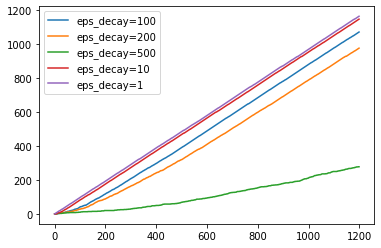

In [24]:
import matplotlib.pyplot as plt
bathc = grille_torch_flat.float().unsqueeze(0)
steps_done = 0
plt.plot(np.cumsum([select_action(bathc, eps_decay=100, simulate=True) for i in range(1200)]),label="eps_decay=100" )
steps_done = 0
plt.plot(np.cumsum([select_action(bathc, eps_decay=200, simulate=True) for i in range(1200)]),label="eps_decay=200" )
steps_done = 0
plt.plot(np.cumsum([select_action(bathc, eps_decay=3500, simulate=True) for i in range(1200)]),label="eps_decay=500" )
steps_done = 0
plt.plot(np.cumsum([select_action(bathc, eps_decay=10, simulate=True) for i in range(1200)]),label="eps_decay=10" )
steps_done = 0
plt.plot(np.cumsum([select_action(bathc, eps_decay=1, simulate=True) for i in range(1200)]),label="eps_decay=1" )

#plt.plot(np.cumsum([1 for i in range(1000)]))
plt.legend()

In [25]:
steps_done = 0
#plt.plot(np.cumsum([select_action(bathc, eps_decay=3, simulate=True) for i in range(10)]),label="eps_decay=1" )

In [26]:
class SmartBot():
    def __init__(self):
        pass
    
    def compute(self, grille):
        state = preprocess_grille(grille, to_cnn=True)
        action = select_action(state, 10000)
        action = position_to_input.get(int(action.squeeze()))
        return action

In [27]:
from collections import deque
class ReplayMemory():
    def __init__(self):
        self.buffer= deque()
    def sample(self, n=100):
        sampled_ids = np.random.randint(0, len(self.buffer), n)
        return [self.buffer[s] for s in sampled_ids]#, [self.buffer[s + 1] for s in sampled_ids if self.buffer[s][3] and s +<]
    
    def push(self, state, action, reward, is_done):
        self.buffer.append((state, action, reward, is_done))
        
    def get_all_history(self):
        return self.buffer
        

In [28]:
batch_size = 256

def optimize_model(memory, policy_net, target_net):
    samples = memory.sample(batch_size)
    state_batch = torch.vstack([preprocess_grille(s[0],to_cnn=True) for s in samples]).float()
    action_batch = torch.vstack([torch.tensor(s[1]) for s in samples])
    reward_batch = torch.vstack([torch.tensor(s[2]) for s in samples]).float()
    state_act = policy_net.eval()(state_batch)
    state_action_values = state_act.gather(1, action_batch)
    expected_state_action_values = reward_batch
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()
    return loss, state_act.mean(0).detach().numpy()

In [29]:
target_net = DQN(12, 12, num_actions)

In [69]:
steps_done = 80000

In [31]:
#memory = ReplayMemory()

In [82]:
from torch import  optim
import torch.nn.functional as F
continue_train = True
#optimizer = optim.RMSprop(policy_net.parameters(), lr=0.0001)
optimizer = optim.RMSprop(policy_net.parameters(), lr=0.0001)
if not continue_train:
    steps_done = 0
    #policy_net = Feedforward(grille_torch_flat.shape[0], hidden_size, num_actions)
    #target_net = Feedforward(grille_torch_flat.shape[0], hidden_size, num_actions)
    policy_net = DQN(12, 12, num_actions)
    target_net = DQN(12, 12, num_actions)
    optimizer = optim.RMSprop(policy_net.parameters(), lr=0.001)
    #optimizer = optim.RMSprop(policy_net.parameters(), lr=0.01)
    memory = ReplayMemory()

sb = SmartBot()
stupb = StupidBot()
num_episodes = 5000
len_episodes = []
nb_eats = []
losses = []
for i_episode in range(num_episodes):
    sn = Snake(sizes, sb, n_food=3)
    state = sn.reset()
    state = preprocess_grille(state, to_cnn=True)
    game_iterator = sn.play()
    len_episode = 0
    nb_eat = 0
    actions = []
    while True:
        len_episode+=1
        reward, grille, user_action, is_done = next(game_iterator)
        if is_done:
            reward = 0
        if reward > 0.7:
            nb_eat+=1
        memory.push(grille, input_to_position.get(user_action), reward, is_done)
        loss, state_act = optimize_model(memory, policy_net, target_net)
        #loss, state_act = torch.zeros(1), 0
        actions.append(user_action)
        if is_done:
            len_episodes.append(len_episode)
            losses.append(loss.item())
            nb_eats.append(nb_eat)
            #print(f"Episode duration:{len_episode}, loss: {loss}, steps done: {steps_done}, state acts: {state_act} ,actions {actions[:10]}")
            break

        if i_episode % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())
    if i_episode % 50 == 0:
        print(f"Episode duration:{len_episode}, loss: {loss}, steps done: {steps_done}, state acts: {state_act} ,actions {actions[:10]}")
        print("#"*5 ,f"Long duration: {np.mean(len_episodes[-50:])}, long loss: {np.mean(losses[-50:])}, nb eats: {np.mean(nb_eats[-50:])}")
        #joblib.dump(memory, "memory.rb")

Episode duration:46, loss: 0.00040740324766375124, steps done: 121830, state acts: [0.62813133 0.64336616 0.6337929  0.6341557 ] ,actions [8, 6, 4, 6, 8, 6, 6, 5, 4, 5]
##### Long duration: 46.0, long loss: 0.00040740324766375124, nb eats: 2.0
Episode duration:101, loss: 0.00018657033797353506, steps done: 125218, state acts: [0.64172155 0.6372299  0.6363715  0.6257673 ] ,actions [8, 6, 6, 6, 6, 8, 6, 5, 5, 4]
##### Long duration: 67.76, long loss: 0.00037847307612537406, nb eats: 4.56
Episode duration:126, loss: 0.00013297886471264064, steps done: 128821, state acts: [0.6362527  0.645505   0.65810823 0.6368941 ] ,actions [4, 4, 4, 6, 4, 5, 4, 5, 6, 6]
##### Long duration: 72.06, long loss: 0.00031649712662328966, nb eats: 4.74
Episode duration:67, loss: 0.000643051927909255, steps done: 132527, state acts: [0.62347084 0.64741915 0.6255265  0.6423248 ] ,actions [8, 8, 8, 8, 4, 5, 8, 4, 8, 5]
##### Long duration: 74.12, long loss: 0.00033704833505908026, nb eats: 5.0
Episode duration:13

Episode duration:79, loss: 0.00019079531193710864, steps done: 279123, state acts: [0.6395958 0.6181381 0.6268729 0.6124072] ,actions [5, 4, 8, 5, 4, 8, 6, 5, 4, 8]
##### Long duration: 103.68, long loss: 0.0004664528580906335, nb eats: 5.88
Episode duration:50, loss: 0.0001285393227590248, steps done: 284269, state acts: [0.60946965 0.60991096 0.6064819  0.6119887 ] ,actions [4, 4, 5, 8, 5, 4, 8, 8, 8, 6]
##### Long duration: 102.92, long loss: 0.00028510621777968483, nb eats: 6.36
Episode duration:77, loss: 0.0004973258473910391, steps done: 289203, state acts: [0.61939067 0.61815715 0.6265774  0.6216803 ] ,actions [6, 4, 5, 8, 4, 4, 6, 5, 8, 8]
##### Long duration: 98.68, long loss: 0.00031501037228736094, nb eats: 5.8


KeyboardInterrupt: 

In [80]:
memory

['memory.rb']

In [72]:
import joblib
use_old_memory=True
if use_old_memory:
    joblib.dump(memory, "memory.rb")

In [81]:
memory = joblib.load("memory.rb")

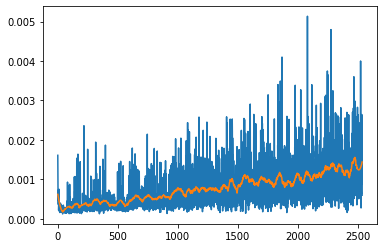

In [116]:
from scipy.signal import savgol_filter 

plt.plot(losses)
plt.plot(savgol_filter(losses, 81, 2))

In [50]:
h = memory.get_all_history()

In [51]:
len([a for a in h if a[2]>1])
len(h)

57995

In [52]:
len([a for a in h if a[2] > 0.7])

1639

In [280]:
len([a for a in h if a[2] > 0.5])/len(h)

0.038027909910383434

In [122]:
#[a for a in h if a[2]>0.5]

In [123]:
# Replaybot

In [85]:
class Replaybot():
    def __init__(self):
        pass
    
    def compute(self, grille):
        pnet = policy_net.eval()
        state = preprocess_grille(grille, to_cnn=True)
        actions_probas = pnet(state).squeeze()
        best_prob = [(input_to_dir[i], a.item()) for i, a in enumerate(actions_probas)]
        print(sorted(best_prob, key=lambda x: x[1],reverse=True))
        return position_to_input[actions_probas.argmax(0).item()]
rb = Replaybot()

In [86]:
sn = Snake(sizes, rb, n_food=3)
state = sn.reset()
state = preprocess_grille(state, to_cnn=True)
game_iterator = sn.play()
step = 0
while True:
    step+=1
    print("Step:", step)
    reward, grille, user_action, is_done = next(game_iterator)
    plt.matshow(grille)
    plt.show()
    sleep(1.5)
    clear_output()
    if is_done:
        print("Crash")
        break4
        

Step: 2535
[('right', 0.7056070566177368), ('up', 0.7029986381530762), ('left', 0.7003551721572876), ('down', 0.6967817544937134)]


KeyboardInterrupt: 

In [128]:
input_to_dir = {
    0 :"left",
    2 :"right",
    3 :"up",
    1 :"down"
}

In [129]:
state_batch.shape

torch.Size([454, 1, 12, 12])

In [258]:
#policy_net = Feedforward(grille_torch_flat.shape[0], hidden_size, num_actions)
policy_net = DQN(12, 12, num_actions)

In [62]:
optimizer = optim.RMSprop(policy_net.parameters(), lr=0.0001) # 0.003 
for i in range(1000):
    samples_eat = [a for a in h if a[2]>0.7]
    samples = memory.sample(len(samples_eat))
    samples +=samples_eat

    state_batch = torch.vstack([preprocess_grille(s[0], to_cnn=True) for s in samples])
    action_batch = torch.vstack([torch.tensor(s[1]) for s in samples])
    reward_batch = torch.vstack([torch.tensor(s[2]) for s in samples]).float()

    state_action_values = policy_net(state_batch).gather(1, action_batch)
    expected_state_action_values = reward_batch
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
    print(loss.item())
    optimize_model(memory, policy_net, target_net)

0.000587404821999371
0.0009129481040872633
0.0004717367410194129
0.0005339636118151248
0.0004953492316417396
0.0004638074606191367
0.0004633752687368542
0.0005243190098553896
0.0004509859427344054
0.0004425463848747313
0.00045034210779704154
0.0003975657164119184
0.0003862941521219909
0.00042805849807336926
0.00044528840226121247
0.000363915110938251
0.00040179258212447166
0.00043409832869656384
0.0003907932841684669
0.000393537717172876
0.0003729047311935574
0.00041792215779423714
0.00038798575405962765
0.00039914296939969063
0.00038010187563486397
0.00042428600136190653
0.00038001418579369783
0.0003837740223389119
0.00039762022788636386
0.0003695809282362461
0.0004377220757305622
0.000364593492122367
0.0003434294485487044
0.0004067254485562444
0.0003454631078056991
0.0003525814972817898
0.0003599133051466197
0.00035512083559297025
0.00040368098416365683
0.0003631658910308033
0.00038771508843638003
0.0003932876861654222
0.000338996818754822
0.00035184749867767096
0.0003479771257843822

KeyboardInterrupt: 

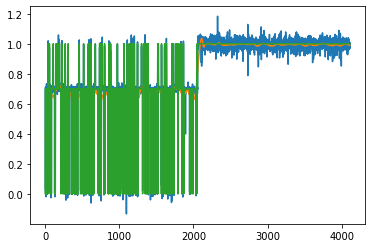

In [63]:
sa_np = state_action_values.flatten().detach().numpy()
re_np = reward_batch.flatten().detach().numpy()
plt.plot(sa_np)
plt.plot(savgol_filter(sa_np, 201, 5))
plt.plot(re_np)

In [87]:
torch.save(policy_net, "cnn_eat_flat_reward.ckpt")
#torch.load("cnn_eat3_8.ckpt")

In [151]:
 policy_net

tensor([[0.3495, 0.3383, 0.3567, 0.2690],
        [0.2725, 0.2617, 0.2545, 0.2909],
        [0.2603, 0.2502, 0.2640, 0.2733],
        ...,
        [0.3912, 0.3784, 0.3523, 0.2674],
        [0.3550, 0.2995, 0.3257, 0.2870],
        [0.2857, 0.3369, 0.3121, 0.3241]], grad_fn=<AddmmBackward>)

In [147]:
reward_batch

tensor([[0.3000],
        [0.3000],
        [0.3000],
        ...,
        [1.0000],
        [1.0000],
        [1.0000]])

In [113]:
expected_state_action_values

tensor([[0.3000],
        [0.3000],
        [0.3000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [1.0000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.0000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.0000],
        [0.0000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0.3000],
        [0

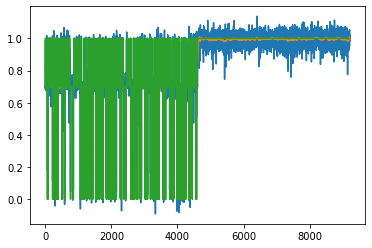

In [88]:
samples_eat = [a for a in h if a[2]>0.7]
samples = memory.sample(len(samples_eat))
samples +=samples_eat

state_batch = torch.vstack([preprocess_grille(s[0], to_cnn=True) for s in samples])
action_batch = torch.vstack([torch.tensor(s[1]) for s in samples])
reward_batch = torch.vstack([torch.tensor(s[2]) for s in samples]).float()

state_action_values = policy_net(state_batch).gather(1, action_batch)
expected_state_action_values = reward_batch
loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
sa_np = state_action_values.flatten().detach().numpy()
re_np = reward_batch.flatten().detach().numpy()
plt.plot(sa_np)
plt.plot(savgol_filter(sa_np, 201, 5))
plt.plot(re_np)

In [135]:
len(samples_eat)

3204

In [130]:
policy_net.eval()(state_batch).gather(1, action_batch)

tensor([[0.6462],
        [0.5626],
        [0.9197],
        ...,
        [0.5264],
        [0.6215],
        [0.4754]], grad_fn=<GatherBackward>)

In [107]:
reward_batch

tensor([[5.],
        [5.],
        [5.],
        ...,
        [5.],
        [5.],
        [5.]])

In [32]:
samples

[([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   [1, 0, 0, 0, 0, 0, -9, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
  3,
  1,
  False),
 ([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, -9, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [138]:
policy_net(state_batch).sum(0)

tensor([11.5310, 30.7950, 53.9331, 29.7409], grad_fn=<SumBackward1>)

In [ ]:
position_to_input = {
    0:4,
    1:5,
    2:6,
    3:8
}

In [367]:
policy_net(state_batch)[0]

tensor([2.2177e-07, 8.7067e-07, 9.9919e-01, 8.1304e-04],
       grad_fn=<SelectBackward>)

In [286]:
action_batch

tensor([[1],
        [3],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [3],
        [0],
        [1],
        [3],
        [2],
        [1],
        [1],
        [1],
        [3],
        [0],
        [1],
        [2],
        [1],
        [1],
        [2],
        [2],
        [2],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [3],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [2],
        [3],
        [1],
        [1],
        [0],
        [2],
        [3],
        [2],
        [1],
        [3],
        [2],
        [1],
        [1],
        [1],
        [1],
        [3],
        [1],
        [1],
        [3],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [2],
        [1],
        [1],
        [0],
        [3],
        [0],
        [1],
        [1],

In [309]:
policy_net(state_batch).argmax(1)[0].item()

2

In [ ]:
input_to_dir = {
    0 :"left",
    2 :"right",
    3 :"up",
    1 :"down"
}

position_to_input = {
    0:4,
    1:5,
    2:6,
    3:8
}

{
    4: "left"
    5: "down",
    6: "right"
    8: "up"
}

In [207]:
np.sum([4.7006e-09, 4.9460e-13, 2.9612e-16, 7.0566e-08])

7.526709489612e-08

In [241]:
samples[1]

([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 3, 2, 9, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 2,
 1,
 False)

In [193]:
steps_done

1959

In [34]:
[s for s in samples if s[2]>1]

[([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   [1, -9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
  1,
  5,
  False)]

In [91]:
memory.get_all_history()

deque([([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
        1,
        1,
        False)])

In [ ]:
sn.reset()
game_iterator = sn.play()

In [ ]:
next(gen)

In [ ]:
next(game_iterator)

In [60]:
import gym
env = gym.make('CartPole-v0').unwrapped

In [ ]:
is
sn.reset()
gen = sn.play()

In [ ]:

next(gen)

In [ ]:

state = preprocess_grille(state)

In [ ]:
action

In [ ]:
sequence_length = 10
bathc = grille_torch_flat.float().repeat(1, sequence_length).view(sequence_length, grille_torch_flat.shape[0])

In [168]:
bathc.shape

torch.Size([10, 144])

In [175]:
ff(bathc).max(1)[1]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [182]:
bathc = grille_torch_flat.float().unsqueeze(0)

In [183]:
bathc

tensor([[ 0.0000, -0.0338,  1.0690,  0.6767,  2.2361,  2.2361,  2.2361,  2.2361,
          2.2361,  2.2361,  2.2361,  0.0000,  0.0000, -0.4395, -0.5345, -0.4834,
         -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472,  0.0000,
          0.0000, -0.4395, -0.5345, -0.4834, -0.4472, -0.4472, -0.4472, -0.4472,
         -0.4472, -0.4472, -0.4472,  0.0000,  0.0000,  3.2116, -0.5345, -0.4834,
         -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472,  0.0000,
          0.0000, -0.4395, -0.5345, -0.4834, -0.4472, -0.4472, -0.4472, -0.4472,
         -0.4472, -0.4472, -0.4472,  0.0000,  0.0000,  0.3719,  2.6726,  2.9969,
         -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472,  0.0000,
          0.0000, -0.4395, -0.5345, -0.4834, -0.4472, -0.4472, -0.4472, -0.4472,
         -0.4472, -0.4472, -0.4472,  0.0000,  0.0000, -0.4395, -0.5345, -0.4834,
         -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472, -0.4472,  0.0000,
          0.0000, -0.4395, -